# Basics - Replacing and Thresholding

Also super common for cleaning datasets.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("AB_NYC_2019.csv")
df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


## Dealing with NaNs

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
# drop any row if nan in column
df.dropna(subset=["last_review"]).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38843 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38843 non-null  int64  
 1   name                            38837 non-null  object 
 2   host_id                         38843 non-null  int64  
 3   host_name                       38827 non-null  object 
 4   neighbourhood_group             38843 non-null  object 
 5   neighbourhood                   38843 non-null  object 
 6   latitude                        38843 non-null  float64
 7   longitude                       38843 non-null  float64
 8   room_type                       38843 non-null  object 
 9   price                           38843 non-null  int64  
 10  minimum_nights                  38843 non-null  int64  
 11  number_of_reviews               38843 non-null  int64  
 12  last_review                     

In [9]:
# replace nan values with zero
df.fillna(0);

# for time-series, can use .backfill() or .ffill() but dataframe must be sorted

## Generic replace

In [10]:
# Operate by every row and column
df.replace("John", "Jono").head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,Jono,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365


In [11]:
# Operate on 1 column, with limit on replacement
df.host_name.replace("John", "Jono", limit=1)[0]

'Jono'

In [12]:
# Can replace using key-value pairs from dict
df.replace({"John": "Jono", "Brooklyn": "Brooky"}).head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,Jono,Brooky,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365


## Thresholding

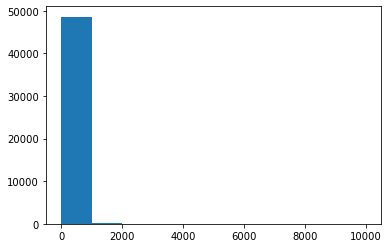

In [15]:
import matplotlib.pyplot as plt
plt.hist(df.price);

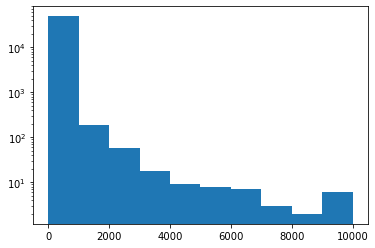

In [16]:
plt.hist(df.price, log=True);

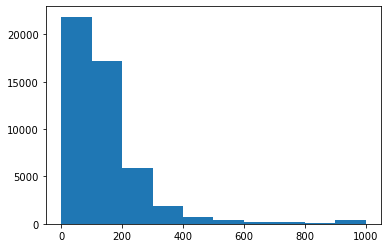

In [18]:
plt.hist(df.price.clip(upper=1000));

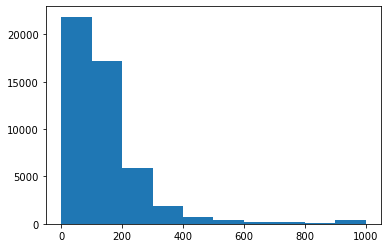

In [19]:
df2 = df.copy()
df2.loc[df2.price > 1000, "price"] = 1000
plt.hist(df2.price);

### Recap

* dropna
* fillna
* replace
* clip
* manual thresholding